In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rc("font", size=14) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
data=data.dropna() 
print(data.shape)
data.head()

Mounted at /content/drive
(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
a=1000*(5-1) 
data=data.iloc[a:a+10000,:] 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
4000,50,services,divorced,professional.course,no,yes,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4001,54,blue-collar,single,unknown,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4002,39,management,married,university.degree,no,yes,no,telephone,may,wed,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4003,33,entrepreneur,married,high.school,no,no,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4004,59,retired,divorced,professional.course,no,no,no,telephone,jun,tue,...,1,999,1,failure,-1.7,94.055,-39.8,0.702,4991.6,0


In [ ]:
data['education'] = np.where(data['education'] =='basic.9y',
'Basic', data['education'])
data['education'] = np.where(data['education'] =='basic.6y',
'Basic', data['education'])
data['education'] = np.where(data['education'] =='basic.4y',
'Basic', data['education']) 


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
4000,50,services,divorced,professional.course,no,yes,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4001,54,blue-collar,single,unknown,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4002,39,management,married,university.degree,no,yes,no,telephone,may,wed,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4003,33,entrepreneur,married,high.school,no,no,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4004,59,retired,divorced,professional.course,no,no,no,telephone,jun,tue,...,1,999,1,failure,-1.7,94.055,-39.8,0.702,4991.6,0


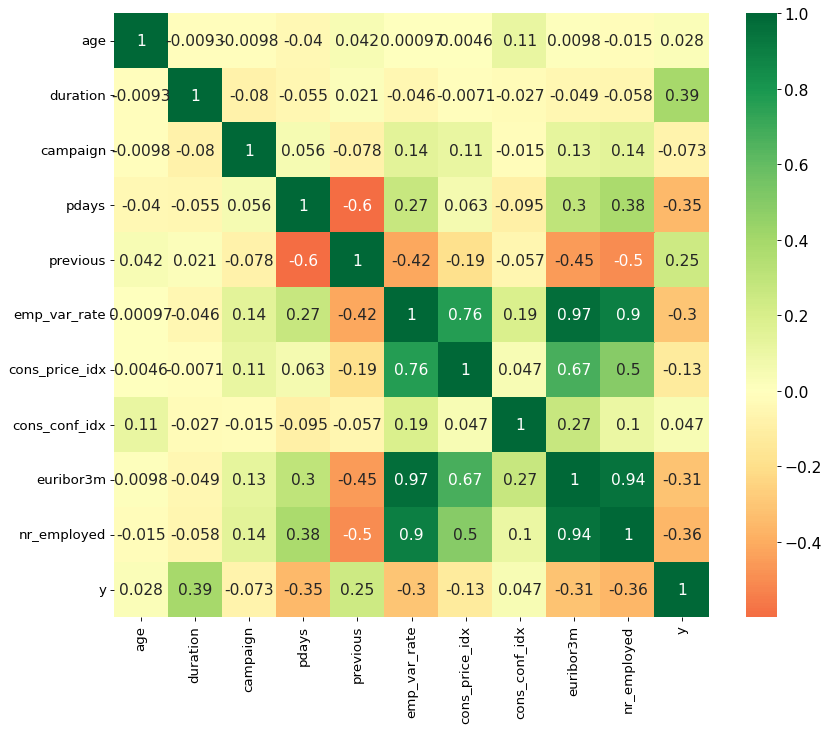

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), mask = np.zeros_like(data.corr()), xticklabels = data.corr().columns, yticklabels = data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print(list(data.columns))
print(data.groupby('y').mean())
data.drop(data.columns[[0,11]], axis = 1, inplace = True) 

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
         age    duration  campaign       pdays  previous  emp_var_rate  \
y                                                                        
0  39.911705  222.452483  2.593013  985.842507  0.132217      0.252741   
1  40.852459  555.049180  1.962659  778.297814  0.530055     -1.253188   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
y                                                         
0       93.608154     -40.544967   3.811580  5175.878466  
1       93.375667     -39.855191   2.075606  5091.629144  


In [ ]:
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


Text(0, 0.5, 'Frequency of Purchase')

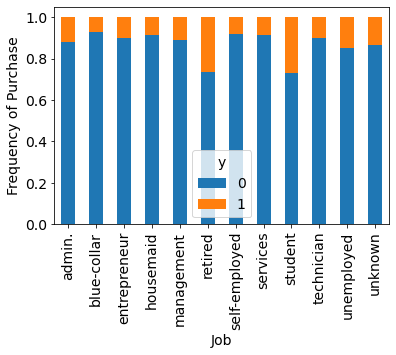

In [ ]:
table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

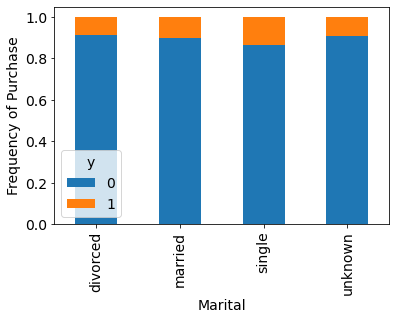

In [ ]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Marital')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

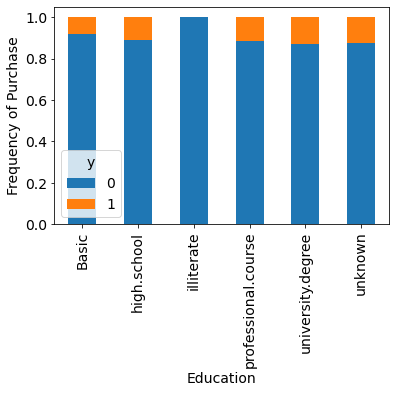

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

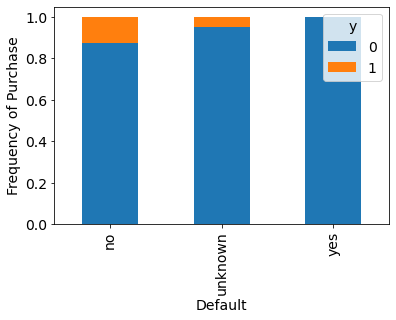

In [ ]:
table=pd.crosstab(data.default,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Default')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

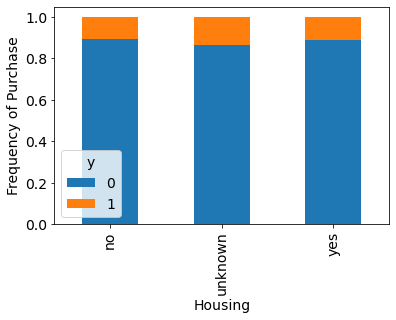

In [ ]:
table=pd.crosstab(data.housing,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

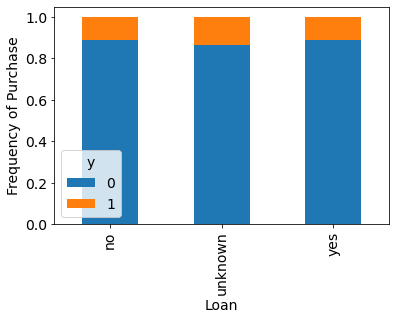

In [ ]:
table=pd.crosstab(data.loan,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Loan')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

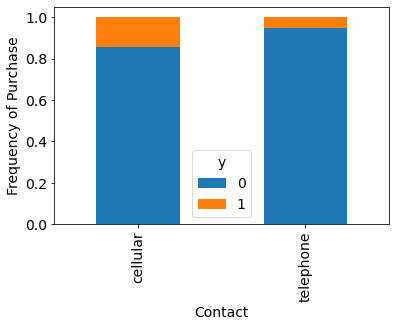

In [ ]:
table=pd.crosstab(data.contact,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Contact')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

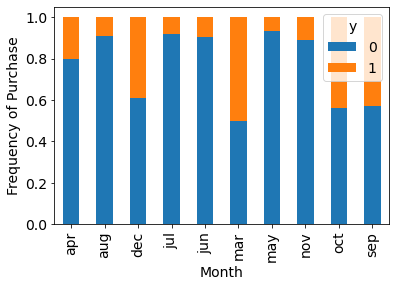

In [ ]:
table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

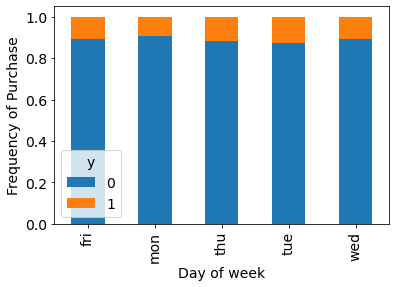

In [ ]:
table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

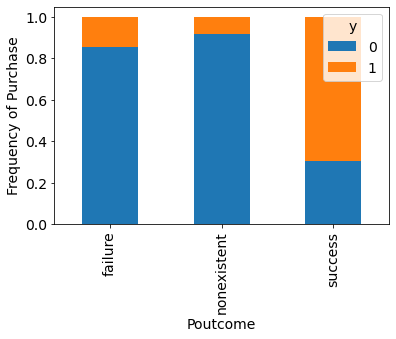

In [ ]:
  table=pd.crosstab(data.poutcome,data.y)
  table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
  stacked=True)
  plt.xlabel('Poutcome')
  plt.ylabel('Frequency of Purchase')

In [ ]:
print(list(data.columns))
data.drop(data.columns[[1,4,5,8]], axis = 1, inplace = True) 

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [ ]:
print(list(data.columns))

['job', 'education', 'default', 'contact', 'month', 'duration', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [ ]:
data = pd.get_dummies(data, columns =['job', 'education', 'default', 'contact', 'month', 'poutcome']) 

In [ ]:
data.head()

,duration,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
4000,329,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,...,0,1,0,0,0,0,0,0,1,0
4001,122,999,0,1.4,93.918,-42.7,4.962,5228.1,0,0,...,1,0,0,0,0,0,0,0,1,0
4002,51,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4003,214,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4004,8,999,1,-1.7,94.055,-39.8,0.702,4991.6,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
print(list(data.columns)) 

['duration', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [ ]:
data.drop(data.columns[[20,26,28]], axis = 1, inplace = True) 

In [ ]:
print(list(data.columns))
data.drop(data.columns[[4,5]], axis = 1, inplace = True)  

['duration', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [ ]:
print(list(data.columns))

['duration', 'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


Короче брачо ты провтыкал consы они руинят(я уверен) щас переделывать впадлу, если сильно заруинит переделай !!!

In [ ]:
X = data.loc[:,data.columns!='y']
Y = data.loc[:,data.columns=='y']
Y=Y['y'] 

In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7500, 39)
(2500, 39)
(7500,)
(2500,)


In [ ]:
logreg = LogisticRegression(solver='lbfgs',random_state=0, max_iter=250)
logreg.fit(X_train,Y_train) 

LogisticRegression(max_iter=250, random_state=0)

In [ ]:
predicted_y = logreg.predict(X_test)
predicted_y
print('Accuracy: {:.4f}'.format(logreg.score(X_test, Y_test))) 

Accuracy: 0.9264


In [ ]:
print(list(data.columns)) 

['duration', 'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predicted_y)

array([[2198,   37],
       [ 147,  118]])

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
logreg1 = LogisticRegressionCV(penalty='l2', Cs=15, random_state=0,
n_jobs=-1, max_iter=1000)
logreg1.fit(X_train,Y_train)
predicted_y = logreg1.predict(X_test)
predicted_y
print('Accuracy: {:.4f}'.format(logreg1.score(X_test, Y_test)))
confusion_matrix(Y_test, predicted_y) 

Accuracy: 0.9252


array([[2207,   28],
       [ 159,  106]])

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())
print(list(data.columns))

         Current function value: 0.608445
         Iterations: 35
                          Results: Logit
Model:                Logit            Pseudo R-squared: -0.745   
Dependent Variable:   y                AIC:              9198.6695
Date:                 2022-05-08 14:19 BIC:              9447.8852
No. Observations:     7500             Log-Likelihood:   -4563.3  
Df Model:             35               LL-Null:          -2615.5  
Df Residuals:         7464             LLR p-value:      1.0000   
Converged:            0.0000           Scale:            1.0000   
No. Iterations:       35.0000                                     
------------------------------------------------------------------
     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------
x1   0.5855       0.0315 18.6087 0.0000        0.5238       0.6472
x2  -0.1543       0.1041 -1.4818 0.1384       -0.3583       0.0498
x3   0.0518       0.09

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [ ]:
from sklearn.svm import SVC
svc =SVC(kernel ="linear", random_state =0)
model = svc.fit(X_train,Y_train)
predicted_y = model.predict(X_test)
print('Accuracy: {:.4f}'.format(model.score(X_test, Y_test)))
confusion_matrix(Y_test, predicted_y) 

Accuracy: 0.9080


array([[2212,   23],
       [ 207,   58]])